<h1 style="color: blue;">Exploring Patient Indicators and Identifying Clusters of Diabetes Risk (Goal 1)</h1>

<h1 style="color: blue;">Data quality checks</h1>

We check:
1) class balance (targets),
2) missing values,
3) duplicate rows,
4) basic validation (range, consistency).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load data
df = pd.read_csv("../data/diabetes_dataset.csv")

print("Shape:", df.shape)
df.head()

Shape: (100000, 31)


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### 1) Class balance

In this step we examine how the target variables are distributed. We compute the counts and proportions for `diagnosed_diabetes` 
and for each category of `diabetes_stage` to see whether some classes are much more frequent than others. 
This helps us understand class imbalance, which is important for choosing suitable evaluation metrics and interpreting model performance.

In [3]:
# 1) Class balance (imbalance)
print("diagnosed_diabetes distribution:")
print(df["diagnosed_diabetes"].value_counts(dropna=False))
print("\nProportions:")
print(df["diagnosed_diabetes"].value_counts(normalize=True, dropna=False))

print("\ndiabetes_stage distribution:")
print(df["diabetes_stage"].value_counts(dropna=False))
print("\nProportions:")
print(df["diabetes_stage"].value_counts(normalize=True, dropna=False))


diagnosed_diabetes distribution:
diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

Proportions:
diagnosed_diabetes
1    0.59998
0    0.40002
Name: proportion, dtype: float64

diabetes_stage distribution:
diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

Proportions:
diabetes_stage
Type 2          0.59774
Pre-Diabetes    0.31845
No Diabetes     0.07981
Gestational     0.00278
Type 1          0.00122
Name: proportion, dtype: float64


#### Results

The binary target `diagnosed_diabetes` is slightly imbalanced: about 60% of patients have diagnosed diabetes and 40% do not. The multi-class target `diabetes_stage` is strongly imbalanced: most patients are classified as Type 2 (≈60%) or Pre-Diabetes (≈32%), while No Diabetes is less frequent (≈8%) and Type 1 and Gestational are very rare (<1% together). This implies that overall accuracy alone would be misleading for stage prediction and that we need class-wise metrics and careful handling of the rare classes.


### 2) Missing values

In [9]:
# 2) Missing values
missing = int(df.isna().sum().sum())
print("Missing values:", missing)

Missing values: 0


### 3) Duplicate rows

In [5]:
# 3) Duplicate rows 

# Exact duplicate rows (all columns identical)
dup_all = df.duplicated().sum()
print("Exact duplicate rows (all columns):", dup_all)

# Duplicates based on all feature columns (excluding targets)
possible_targets = ["diagnosed_diabetes", "diabetes_stage"]
feature_cols = [c for c in df.columns if c not in possible_targets]

dup_features = df.duplicated(subset=feature_cols).sum()
print("Duplicate rows based on features (ignoring targets):", dup_features)

Exact duplicate rows (all columns): 0
Duplicate rows based on features (ignoring targets): 0


In [13]:
# 4) Basic validation

import numpy as np
import pandas as pd

# numeric columns
num_cols = df.select_dtypes(include="number").columns

# 1) Binary columns
binary_like = [c for c in num_cols if df[c].nunique(dropna=False) < 3]
print("Binary columns:", binary_like)
for c in binary_like:
    print(f"{c}: unique values =", np.sort(df[c].unique()))

# 2) Continuous numeric columns (exclude binary)
continuous_cols = [c for c in num_cols if c not in binary_like]

print("\nContinuous feature min/max ranges:")
df[continuous_cols].describe().T[["min", "max"]]


Binary columns: ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
family_history_diabetes: unique values = [0 1]
hypertension_history: unique values = [0 1]
cardiovascular_history: unique values = [0 1]
diagnosed_diabetes: unique values = [0 1]

Continuous feature min/max ranges:


,min,max
age,18.00,90.00
alcohol_consumption_per_week,0.00,10.00
physical_activity_minutes_per_week,0.00,833.00
diet_score,0.00,10.00
sleep_hours_per_day,3.00,10.00
screen_time_hours_per_day,0.50,16.80
bmi,15.00,39.20
waist_to_hip_ratio,0.67,1.06
systolic_bp,90.00,179.00
diastolic_bp,50.00,110.00


#### Results
Binary numeric columns all contain valid values only.  
For continuous numeric features, the min–max ranges are medically plausible (e.g., age 18–90, BMI 15–39, realistic blood pressure and glucose values).  
No impossible values were found, so no range-based filtering was needed.

<h1 style="color: blue;">Exploratory Data Analysis</h1>

We check:
1) descriptive statistics,
2) group comparisons (diabetes vs no diabetes),
3) distribution analysis of key predictors,
4) categorical features and diabetes prevalence,
5) correlation analysis,
6) summary of exploratory findings.

### 1) Descriptive statistics

In this step we summarise the dataset structure and numerical feature ranges using 
df.info() and df.describe(). This helps verify that data types are correct and that 
values fall within medically plausible limits (e.g., age, glucose, HbA1c, BMI). 

In [7]:
# 1) Descriptive statistics
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

,count,mean,std,min,25%,50%,75%,max
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00
alcohol_consumption_per_week,100000.0,2.003670,1.417779,0.00,1.00,2.00,3.00,10.00
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80
family_history_diabetes,100000.0,0.219410,0.413849,0.00,0.00,0.00,0.00,1.00
hypertension_history,100000.0,0.250800,0.433476,0.00,0.00,0.00,1.00,1.00
cardiovascular_history,100000.0,0.079200,0.270052,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20


### 2) Group comparisons (diabetes vs no diabetes)

We compare mean values of key clinical and lifestyle features between patients 
with and without diagnosed diabetes. This allows us to identify which variables 
show the largest differences between groups.

In [8]:
# 2) Group comparisons (diabetes vs no diabetes)

key_num_cols = [
    "age", "bmi", "waist_to_hip_ratio",
    "glucose_fasting", "glucose_postprandial",
    "hba1c", "insulin_level",
    "systolic_bp", "diastolic_bp",
    "cholesterol_total", "hdl_cholesterol", "ldl_cholesterol", "triglycerides",
    "physical_activity_minutes_per_week",
    "diet_score"
]

group_means = df.groupby("diagnosed_diabetes")[key_num_cols].mean().T.round(2)
group_means

diagnosed_diabetes,0,1
age,47.49,51.88
bmi,25.19,25.90
waist_to_hip_ratio,0.85,0.86
glucose_fasting,102.61,116.79
glucose_postprandial,136.17,175.94
hba1c,5.84,6.97
insulin_level,8.71,9.29
systolic_bp,114.13,116.91
diastolic_bp,74.87,75.47
cholesterol_total,183.70,187.50


#### Results
The results show that diabetic patients have substantially higher fasting glucose, postprandial glucose, HbA1c, BMI and blood pressure, supporting the medical understanding of diabetes risk.

### 3) Distribution analysis of key predictors

We visualise the distributions (KDE plots) of five important biological markers: fasting glucose, HbA1c, BMI, insulin level and triglycerides.

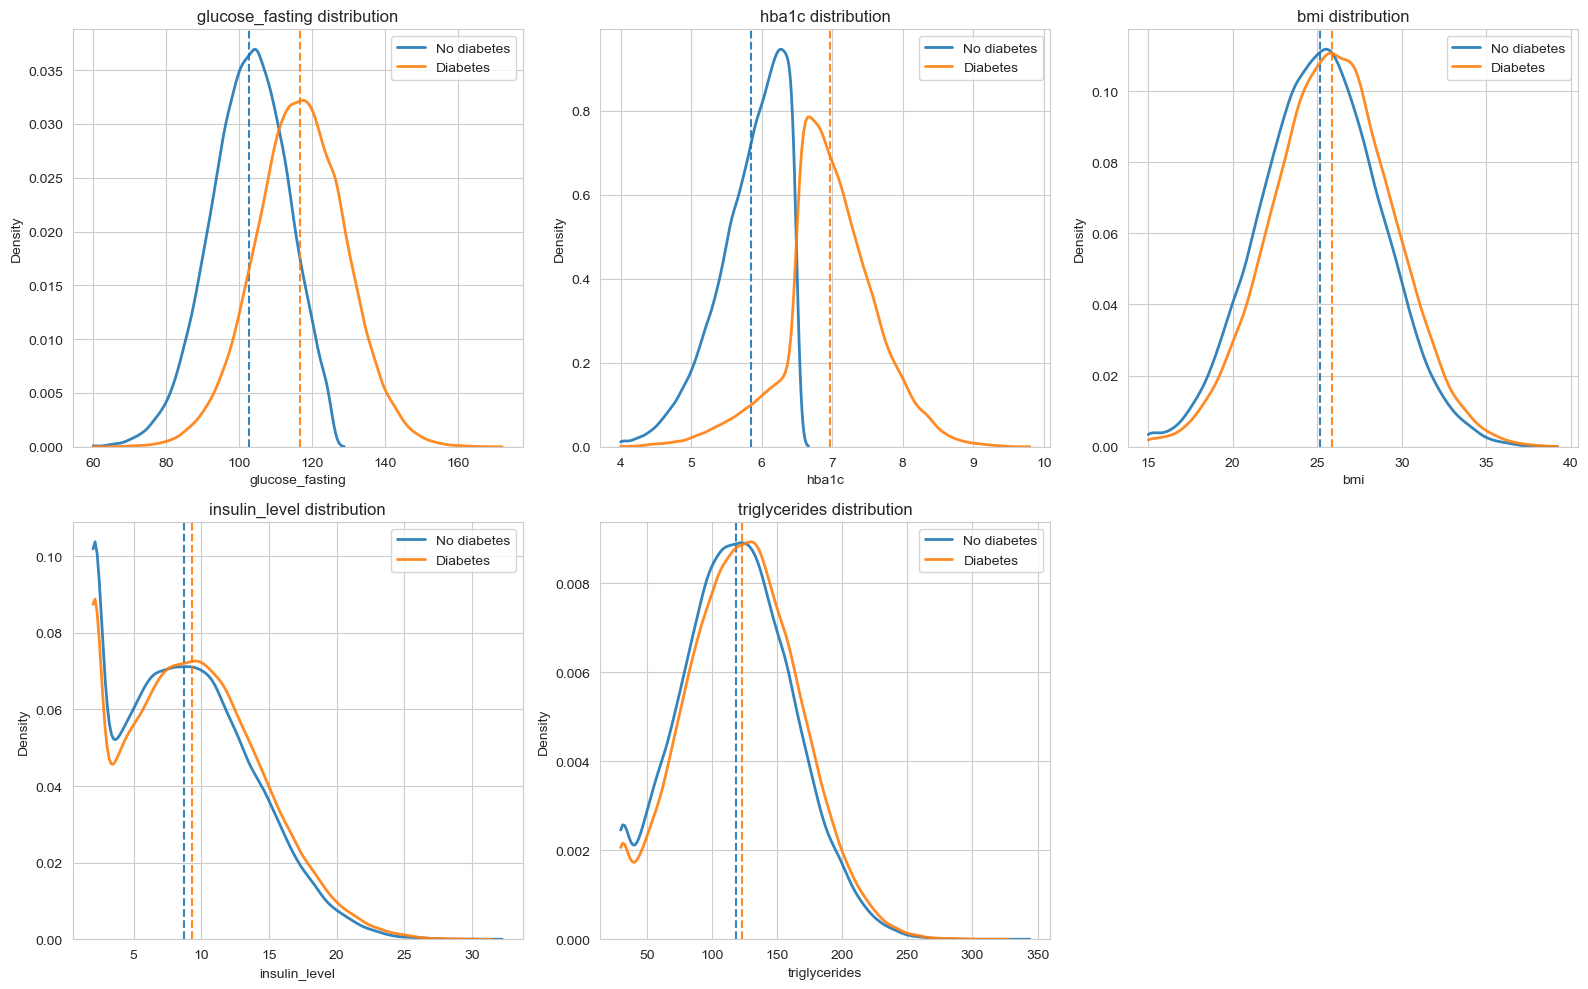

In [9]:
# 3) Distribution analysis of key predictors

sns.set_style("whitegrid")

features = [
    "glucose_fasting",
    "hba1c",
    "bmi",
    "insulin_level",
    "triglycerides"
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    x_min = df[col].min()
    x_max = df[col].max()

    for val, label, color in [
        (0, "No diabetes", "tab:blue"),
        (1, "Diabetes", "tab:orange")
    ]:
            subset = df[df["diagnosed_diabetes"] == val][col]

            sns.kdeplot(
                data=subset,
                ax=ax,
                clip=(x_min, x_max),
                linewidth=2,
                alpha=0.9,
                fill=False,
                color=color,
                label=label
            )

            # keskmise joon
            ax.axvline(
                subset.mean(),
                linestyle="--",
                linewidth=1.5,
                color=color,
                alpha=0.9
            )

    ax.set_title(f"{col} distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.legend()
    
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Results 

These plots show how the diabetic group shifts towards higher values compared to the non-diabetic group. The right-shift confirms that these variables are strong indicators of diabetes risk.

### 4) Categorical features and diabetes prevalence

We examine how diabetes prevalence differs across demographic and behavioural categories such as gender, ethnicity, smoking status and education level.

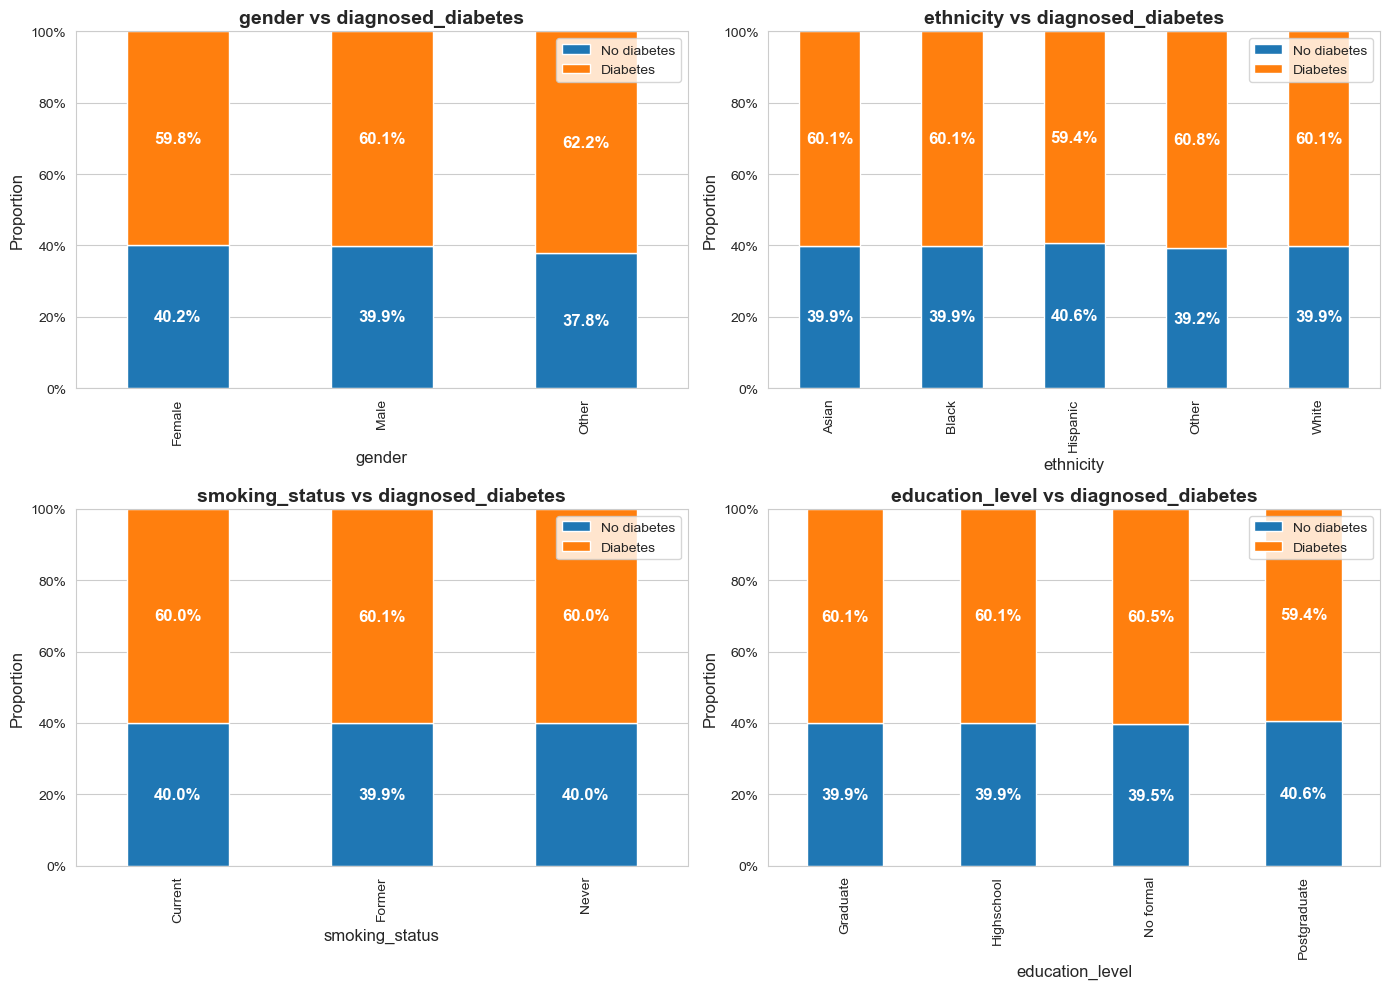

In [10]:
# 4) Categorical variables and diabetes prevalence

cat_cols = ["gender", "ethnicity", "smoking_status", "education_level"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    
    ct = pd.crosstab(df[col], df["diagnosed_diabetes"], normalize="index")
    
    ct.plot(
        kind="bar",
        stacked=True,
        ax=ax
    )
    
    ax.set_title(f"{col} vs diagnosed_diabetes", fontsize=14, fontweight="bold")
    ax.set_ylabel("Proportion", fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.legend(["No diabetes", "Diabetes"], loc="upper right", fontsize=10)
    
    # Adding the percentage
    for i, category in enumerate(ct.index):
        no_diab = ct.loc[category, 0]
        diab = ct.loc[category, 1]
        
        label_fontsize = 12
        label_weight = "bold"
    
        
        ax.text(
            i, 
            no_diab / 2,
            f"{no_diab*100:.1f}%",
            ha="center",
            va="center",
            color="white" if no_diab > 0.15 else "black",
            fontsize=label_fontsize,
            fontweight=label_weight
        )
        
        ax.text(
            i, 
            no_diab + diab/2,
            f"{diab*100:.1f}%",
            ha="center",
            va="center",
            color="white" if diab > 0.15 else "white",
            fontsize=label_fontsize,
            fontweight=label_weight
        )

        ax.set_ylim(0, 1)
        yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
        ax.set_yticks(yticks)
        ax.set_yticklabels([f"{int(t*100)}%" for t in yticks])

plt.tight_layout()
plt.show()

#### Results

Diabetes prevalence differs only modestly across the four categorical variables examined. Gender differences are small, with males showing only a slightly higher proportion of diabetes. Ethnic differences are also limited, with most groups showing around 39–41% non-diabetic and 59–61% diabetic proportions.

Smoking status shows minimal variation, with current, former and never smokers all having very similar prevalence levels. Education level displays slightly more variation.

These findings indicate that demographic and behavioural factors play a weaker role in distinguishing diabetes status compared to clinical biomarkers such as 
glucose levels, HbA1c and BMI.

### 5) Correlation analysis

To identify which numerical features are most strongly associated with diabetes,  we compute the correlation matrix and extract the variables with the strongest positive correlations with the target variable `diagnosed_diabetes`. This helps justify feature selection for the modelling phase and confirms which clinical markers are most predictive of diabetes.

In [11]:
#5) Correlation analysis
corr = df.corr(numeric_only=True)
target_corr = corr["diagnosed_diabetes"].sort_values(ascending=False)
target_corr = target_corr.drop("diagnosed_diabetes")

styled = target_corr.to_frame("Correlation with diabetes").style.background_gradient(
    cmap="coolwarm").set_properties(**{"font-size": "14px"}).set_caption("Feature correlations with diagnosed_diabetes")

styled

,Correlation with diabetes
hba1c,0.679397
glucose_postprandial,0.629832
glucose_fasting,0.510919
diabetes_risk_score,0.277300
family_history_diabetes,0.197926
age,0.137713
bmi,0.097057
systolic_bp,0.095481
waist_to_hip_ratio,0.078918
ldl_cholesterol,0.067475


#### Results

The correlation analysis shows that diabetes is most strongly associated with glycemic biomarkers. HbA1c exhibits the highest correlation with diagnosed diabetes (r ≈ 0.68), followed by postprandial glucose and fasting glucose. These results are clinically consistent, as elevated glucose levels and HbA1c are core diagnostic criteria for diabetes.

Family history of diabetes shows a moderate positive correlation, indicating that genetic predisposition also contributes to risk. Age, BMI, and blood pressure variables exhibit weaker correlations (r ≈ 0.09–0.14), suggesting that while they are relevant metabolic factors, they are less discriminative in this dataset.

Lipid markers such as LDL, HDL, triglycerides, and total cholesterol show only small correlations, and lifestyle-related variables (alcohol consumption, sleep duration, screen time, diet score, and physical activity) display very weak or near-zero correlations with diabetes status.

Overall, the glycemic and metabolic biomarkers dominate the predictive signal, while demographic and lifestyle factors contribute minimally. These findings support prioritising glucose-related features when building predictive models in the next phase.

### 6) Summary of exploratory findings.

The dataset contains 100,000 synthetic patient records with 31 variables covering demographics, lifestyle behaviours, clinical measurements, and two diabetes-related outcomes. The data is complete and clean: no missing values or duplicate rows were found, and all numerical features lie within plausible medical ranges. This means no major preprocessing was required before analysis.

Class balance analysis shows that diagnosed_diabetes is moderately imbalanced (≈60% positive), while diabetes_stage is more strongly imbalanced, with Type 2 being dominant and some categories (e.g., Type 1, Gestational) appearing in very small proportions. This imbalance needs to be taken into account during model evaluation, especially for multi-class prediction.

Exploratory analysis shows clear and clinically consistent differences between individuals with and without diabetes. Diabetic individuals exhibit much higher HbA1c, fasting glucose and postprandial glucose levels, supporting their role as the strongest biochemical markers of diabetes. Additional but smaller differences are observed in age, insulin level, waist-to-hip ratio, systolic and diastolic blood pressure.

Categorical variables such as gender, ethnicity, smoking status and education level were visualised using proportion bar charts. These variables display only minor proportional differences between diabetes and non-diabetes groups, indicating that demographic and lifestyle characteristics have limited discriminative power in this synthetic dataset.

Correlation analysis further confirms these findings. HbA1c (r≈0.68), postprandial glucose (r≈0.63) and fasting glucose (r≈0.51) show the strongest associations with diagnosed diabetes, while family history has a moderate relationship. In comparison, BMI, cholesterol markers, blood pressure and lifestyle-related variables show weak or near-zero correlations.

Overall, the exploratory data analysis suggests that glycemic and metabolic biomarkers are the primary drivers of diabetes risk in this dataset, while demographic and behavioural features contribute less. These insights form the basis for feature selection and modelling strategies in the next tasks, especially for clustering and supervised prediction.

<h1 style="color: blue;">Clustering and Risk Profile Discovery</h1>

We check:
1) preparing the clustering dataset,
2) selecting the number of clusters,
3) K-means clustering,
4) cluster profiles (numerical features),
5) cluster–outcome relationships
6) PCA visualisation of clusters,
7) hierarchical clustering (sample.

### 1) Preparing the clustering dataset

For clustering we remove the target variables (`diagnosed_diabetes`, `diabetes_stage`) and the precomputed `diabetes_risk_score` to avoid leakage. The remaining predictors are split into numerical and categorical features. Numerical variables are standardised and categorical variables are one-hot encoded using a `ColumnTransformer`. This ensures that all features contribute on a comparable scale to the distance calculations in K-means and hierarchical clustering.

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop targets + leakage variable
cluster_df = df.drop(columns=["diagnosed_diabetes", "diabetes_stage", "diabetes_risk_score"])

# Identify numeric and categorical columns
num_cols = cluster_df.select_dtypes(include="number").columns.tolist()
cat_cols = cluster_df.select_dtypes(exclude="number").columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

X = preprocess.fit_transform(cluster_df)
feature_names = preprocess.get_feature_names_out()
len(feature_names), feature_names

Numeric columns: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c']
Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status']


(46,
 array(['num__age', 'num__alcohol_consumption_per_week',
        'num__physical_activity_minutes_per_week', 'num__diet_score',
        'num__sleep_hours_per_day', 'num__screen_time_hours_per_day',
        'num__family_history_diabetes', 'num__hypertension_history',
        'num__cardiovascular_history', 'num__bmi',
        'num__waist_to_hip_ratio', 'num__systolic_bp', 'num__diastolic_bp',
        'num__heart_rate', 'num__cholesterol_total',
        'num__hdl_cholesterol', 'num__ldl_cholesterol',
        'num__triglycerides', 'num__glucose_fasting',
        'num__glucose_postprandial', 'num__insulin_level', 'num__hba1c',
        'cat__gender_Female', 'cat__gender_Male', 'cat__gender_Other',
        'cat__ethnicity_Asian', 'cat__ethnicity_Black',
        'cat__ethnicity_Hispanic', 'cat__ethnicity_Other',
        'cat__ethnicity_White', 'cat__education_level_Graduate',
        'cat__education_level_Highschool',
        'cat__education_level_No formal',
        'cat__education_level_

### 2) Selecting the number of clusters

To determine a suitable number of clusters, we evaluate different values of *k* using two diagnostics:

- **Elbow method**, which plots the within-cluster inertia and helps identify diminishing returns when increasing *k*.
- **Silhouette score**, which measures how well-separated and cohesive the clusters are (higher is better).

We test values of k between 2 and 9 and inspect both curves to select the most appropriate number of clusters for this dataset.

C:\Users\helenaraask\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\helenaraask\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\helenaraask\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\helenaraask\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(ar

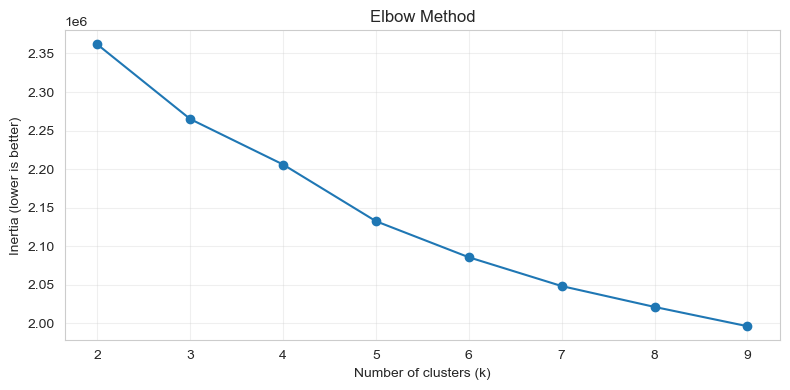

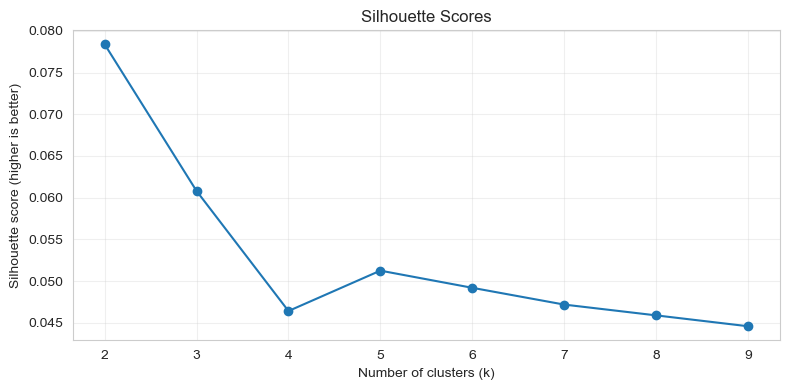

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

K_range = range(2, 10)
inertias = []
sil_scores = []

sample_size = 5000 if X.shape[0] > 5000 else X.shape[0]

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)

    inertias.append(km.inertia_)

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message="Could not find the number of physical cores")
        score = silhouette_score(X, labels, sample_size=sample_size, random_state=42)
    sil_scores.append(score)

# Elbow plot
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (lower is better)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Silhouette plot
plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score (higher is better)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### Result 
Good choice k=3. 

### 3) K-means clustering

Based on the Elbow and Silhouette diagnostics, we set the number of clusters to *k = 3*. We fit a K-means model wrapped in a pipeline together with the preprocessing step (one-hot encoding and scaling), so that the same transformations are always applied. The resulting cluster labels are added back to the original dataset for further analysis.

In [14]:
k = 3 

kmeans_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("kmeans", KMeans(n_clusters=k, random_state=1, n_init=10))
])

cluster_labels = kmeans_pipeline.fit_predict(cluster_df)

df["cluster_kmeans"] = cluster_labels

print("Cluster counts:")
print(df["cluster_kmeans"].value_counts().sort_index())

print("\nCluster proportions (%):")
print((df["cluster_kmeans"].value_counts(normalize=True).sort_index() * 100).round(1))

Cluster counts:
cluster_kmeans
0    32565
1    29262
2    38173
Name: count, dtype: int64

Cluster proportions (%):
cluster_kmeans
0    32.6
1    29.3
2    38.2
Name: proportion, dtype: float64


### 4) Cluster profiles (numerical features)

To understand the clusters, we compare average values of key clinical features such as glucose measures, HbA1c, BMI and blood pressure across clusters. This reveals which clusters correspond to healthier or more adverse metabolic profiles.

In [15]:
health_features = [
    "age", "bmi", "waist_to_hip_ratio",
    "glucose_fasting", "glucose_postprandial", "hba1c",
    "insulin_level",
    "systolic_bp", "diastolic_bp",
    "cholesterol_total", "hdl_cholesterol", "ldl_cholesterol", "triglycerides",
    "physical_activity_minutes_per_week", "sleep_hours_per_day", 
    "screen_time_hours_per_day", "diet_score"
]

cluster_profile = df.groupby("cluster_kmeans")[health_features].mean()
cluster_profile.style.format("{:.2f}").background_gradient(cmap="Blues").set_caption("Cluster Health Profiles")

,age,bmi,waist_to_hip_ratio,glucose_fasting,glucose_postprandial,hba1c,insulin_level,systolic_bp,diastolic_bp,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,physical_activity_minutes_per_week,sleep_hours_per_day,screen_time_hours_per_day,diet_score
cluster_kmeans,,,,,,,,,,,,,,,,,
0,57.30,28.34,0.89,112.24,159.55,6.52,11.17,123.11,77.51,208.51,50.60,128.70,140.33,114.98,7.01,5.97,5.62
1,50.97,25.02,0.85,122.22,187.60,7.28,8.66,115.40,74.97,178.57,54.77,94.54,117.18,104.96,6.99,6.10,6.03
2,43.35,23.74,0.83,101.65,139.32,5.94,7.57,109.87,73.49,172.44,56.42,87.56,108.65,132.96,7.00,5.94,6.29


#### Results
- cluster 1 = most severe, 
- cluster 2 = mild, 
- cluster 0 = mixed

### 5) Cluster–outcome relationships

To determine whether the clusters correspond to meaningful health outcomes, we compare 
(1) the prevalence of diagnosed diabetes and 
(2) the distribution of diabetes stages within each cluster.

If clustering has captured real metabolic differences, we expect clusters with worse health profiles to contain more diagnosed diabetes and more advanced disease stages. These relationships help interpret each cluster as lower-, medium-, or higher-risk groups.

In [16]:
# Diabetes rate (binary outcome)
diabetes_rate = df.groupby("cluster_kmeans")["diagnosed_diabetes"].mean().round(3)
diabetes_rate

cluster_kmeans
0    0.625
1    0.963
2    0.301
Name: diagnosed_diabetes, dtype: float64

In [17]:
# Diabetes stage distribution (multiclass outcome)
stage_distribution = (
    df.groupby("cluster_kmeans")["diabetes_stage"]
    .value_counts(normalize=True)
    .rename("proportion")
    .mul(100)
    .round(1)
)
stage_distribution

cluster_kmeans  diabetes_stage
0               Type 2            62.4
                Pre-Diabetes      34.0
                No Diabetes        3.5
                Gestational        0.1
                Type 1             0.0
1               Type 2            95.9
                Pre-Diabetes       3.7
                Gestational        0.3
                Type 1             0.1
2               Pre-Diabetes      51.6
                Type 2            29.9
                No Diabetes       18.0
                Gestational        0.4
                Type 1             0.2
Name: proportion, dtype: float64

#### Results
- Cluster 1 shows **very high diabetes prevalence (96%)** and is dominated by **Type 2 diabetes (96%)**.  
- Cluster 0 shows a **mixed profile**, with Type 2 (62%) and Pre-Diabetes (34%).  
- Cluster 2 shows the **mildest profile**, higher share of Pre-Diabetes (52%) and **18% No Diabetes**.  
This confirms that the clusters represent meaningful metabolic risk groups.

### 6) PCA visualisation of clusters

Because the feature space after preprocessing is high-dimensional, we apply Principal Component Analysis (PCA) to reduce it to two dimensions for visualisation. The scatter plot shows how well the clusters separate in this reduced space.

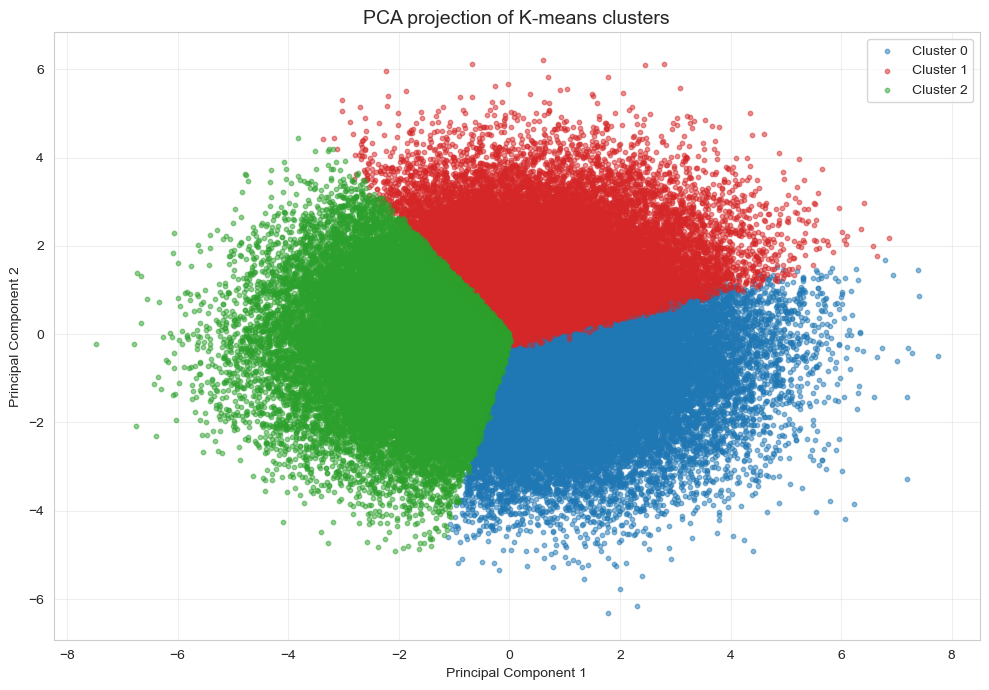

In [18]:
from sklearn.decomposition import PCA

# PCA to 2 components
pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X)

# Add PCA components to df for plotting
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 7))

colors = {0: "#1f77b4", 1: "#d62728", 2: "#2ca02c"}
labels = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2"}

for c in [0, 1, 2]:
    subset = df[df["cluster_kmeans"] == c]
    plt.scatter(
        subset["PCA1"],
        subset["PCA2"],
        s=10,
        alpha=0.5,
        color=colors[c],
        label=labels[c]
    )

plt.title("PCA projection of K-means clusters", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 7) Hierarchical clustering (sample)

Hierarchical clustering is applied on a small random sample of the dataset because full dendrograms become unreadable and computationally expensive with large datasets (100,000 rows).

We use Ward linkage on scaled numerical features to visualise rough cluster structure and check whether it agrees with the K-means segmentation.

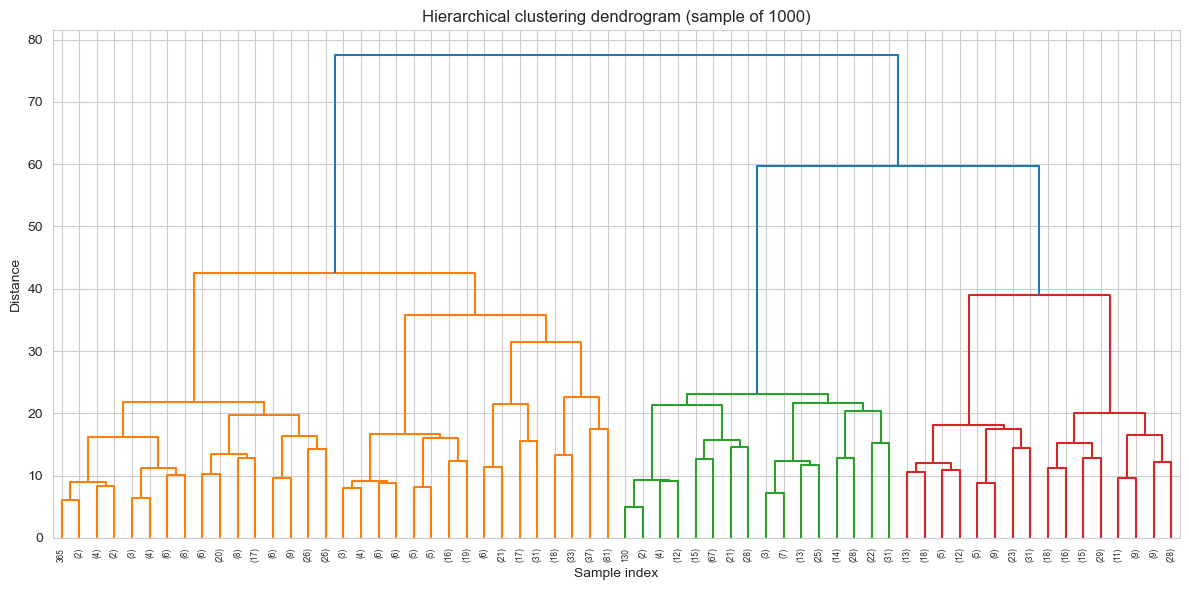

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

sample_size = 1000
df_sample = df.sample(sample_size, random_state=42)
num_cols = df_sample.select_dtypes(include="number").columns.tolist()

# Scale numeric features
scaler = StandardScaler()
X_sample = scaler.fit_transform(df_sample[num_cols])

# Compute linkage matrix 
Z = linkage(X_sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)  # truncate to avoid overplotting
plt.title("Hierarchical clustering dendrogram (sample of 1000)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#### Result
The hierarchical clustering dendrogram (sample of 1000 rows) shows three major branches that merge at a high linkage distance. This indicates the presence of approximately three large groups in the data, which is consistent with the K-means solution (k = 3). The sample-based dendrogram confirms the overall cluster structure despite the high dimensionality of the full dataset.